In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501 (1).xlsx


In [13]:
df = pd.read_excel('202501.xlsx')

In [14]:
# 시간 컬럼 datetime으로 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])

In [15]:
# PM2.5 컬럼명 지정
pm25_column = 'Conc(ug/m3)'

In [16]:
# 날짜 분할 (11일 단위)
unique_dates = df['Pump-Begin'].dt.date.unique()
chunks = [unique_dates[i:i+11] for i in range(0, len(unique_dates), 11)]

In [17]:
# 금속별 최대값 설정
pm25_max = df['Conc(ug/m3)'].max() * 1.1

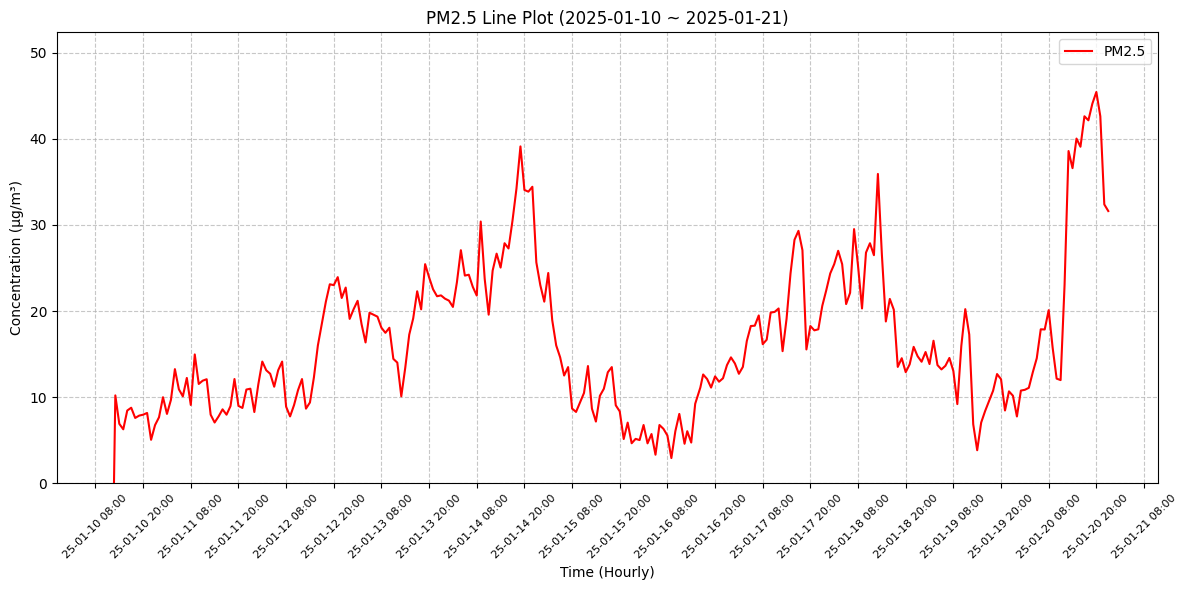

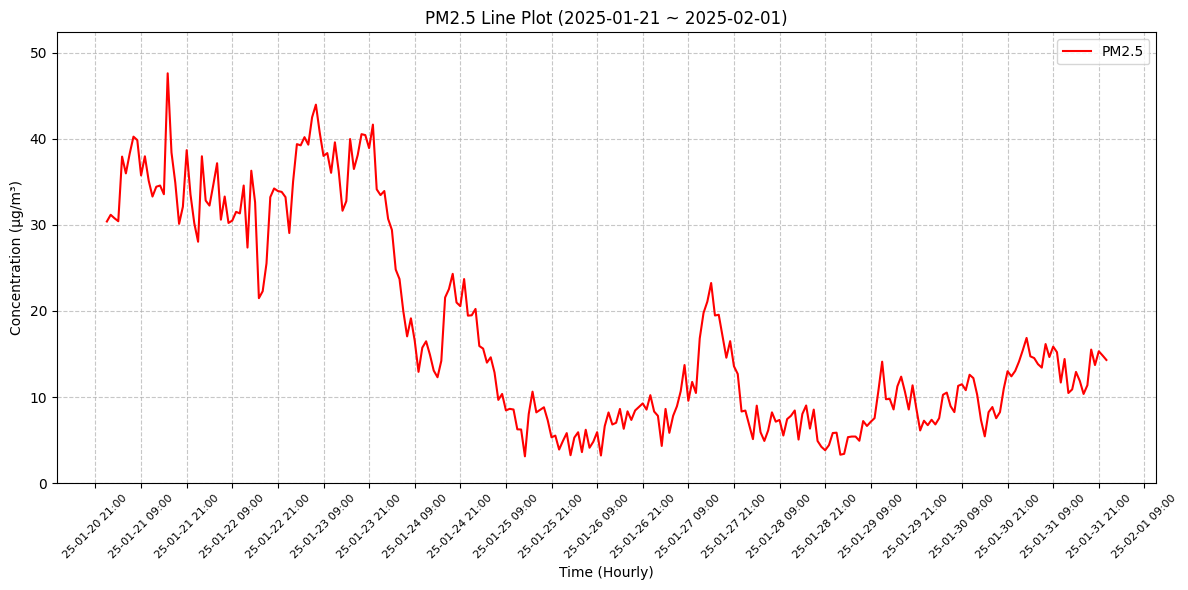

In [19]:
# PM2.5 선그래프 생성
for date_group in chunks:
    start_date = pd.to_datetime(min(date_group))
    end_date = pd.to_datetime(max(date_group)) + pd.Timedelta(days=1)

    temp_df = df[(df['Pump-Begin'] >= start_date) & (df['Pump-Begin'] < end_date)].copy()
    temp_df = temp_df.sort_values('Pump-Begin')

    plt.figure(figsize=(12, 6))
    plt.plot(temp_df['Pump-Begin'], temp_df[pm25_column], color='red', label='PM2.5', linewidth=1.5)

    # x축 설정 (12시간 단위로 표시, 데이터는 1시간 단위)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
    plt.xticks(rotation=45, fontsize=8)

    # y축 최대값 설정
    plt.ylim(0, pm25_max)

    # 격자 설정
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.xlabel('Time (Hourly)')
    plt.ylabel('Concentration (µg/m³)')
    plt.title(f'PM2.5 Line Plot ({start_date.date()} ~ {end_date.date()})')

    # 그래프 출력
    plt.legend()
    plt.tight_layout()
    plt.show()